In [1]:
#24MAI0114 ABHAYNATH K
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
#Loading the titanic dataset
url= "https://github.com/datasciencedojo/datasets/blob/master/titanic.csv"
titanic=pd.read_csv(r"D:\VIT\AI ML\titanic.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:

#24MAI0114 ABHAYNATH K
titanic=titanic.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)


In [5]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
#24MAI0114 ABHAYNATH K
#fill missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
titanic["Embarked"].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [8]:
#24MAI0114 ABHAYNATH K
titanic.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
#Encoding the catagorical features
titanic=pd.get_dummies(titanic,columns=['Sex','Embarked'], drop_first=True)

In [10]:
#24MAI0114 ABHAYNATH K
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [11]:
#24MAI0114 ABHAYNATH K
#Define Feature targets
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [12]:
#Train test split
x_train, x_test, y_train , y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [13]:
#24MAI0114 ABHAYNATH K
#creating of decision tree classifier
clf=DecisionTreeClassifier(random_state=42)
clf=clf.fit(x_train, y_train)

In [14]:
#Make prediction
y_pred=clf.predict(x_test)

In [15]:
#24MAI0114 ABHAYNATH K
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [16]:
#24MAI0114 ABHAYNATH K
#evaluation of model
accuracy= accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report: ')
print(classification_report(y_test,y_pred))
print('\nconfusion_matrix')
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.78

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179


confusion_matrix
[[84 21]
 [18 56]]


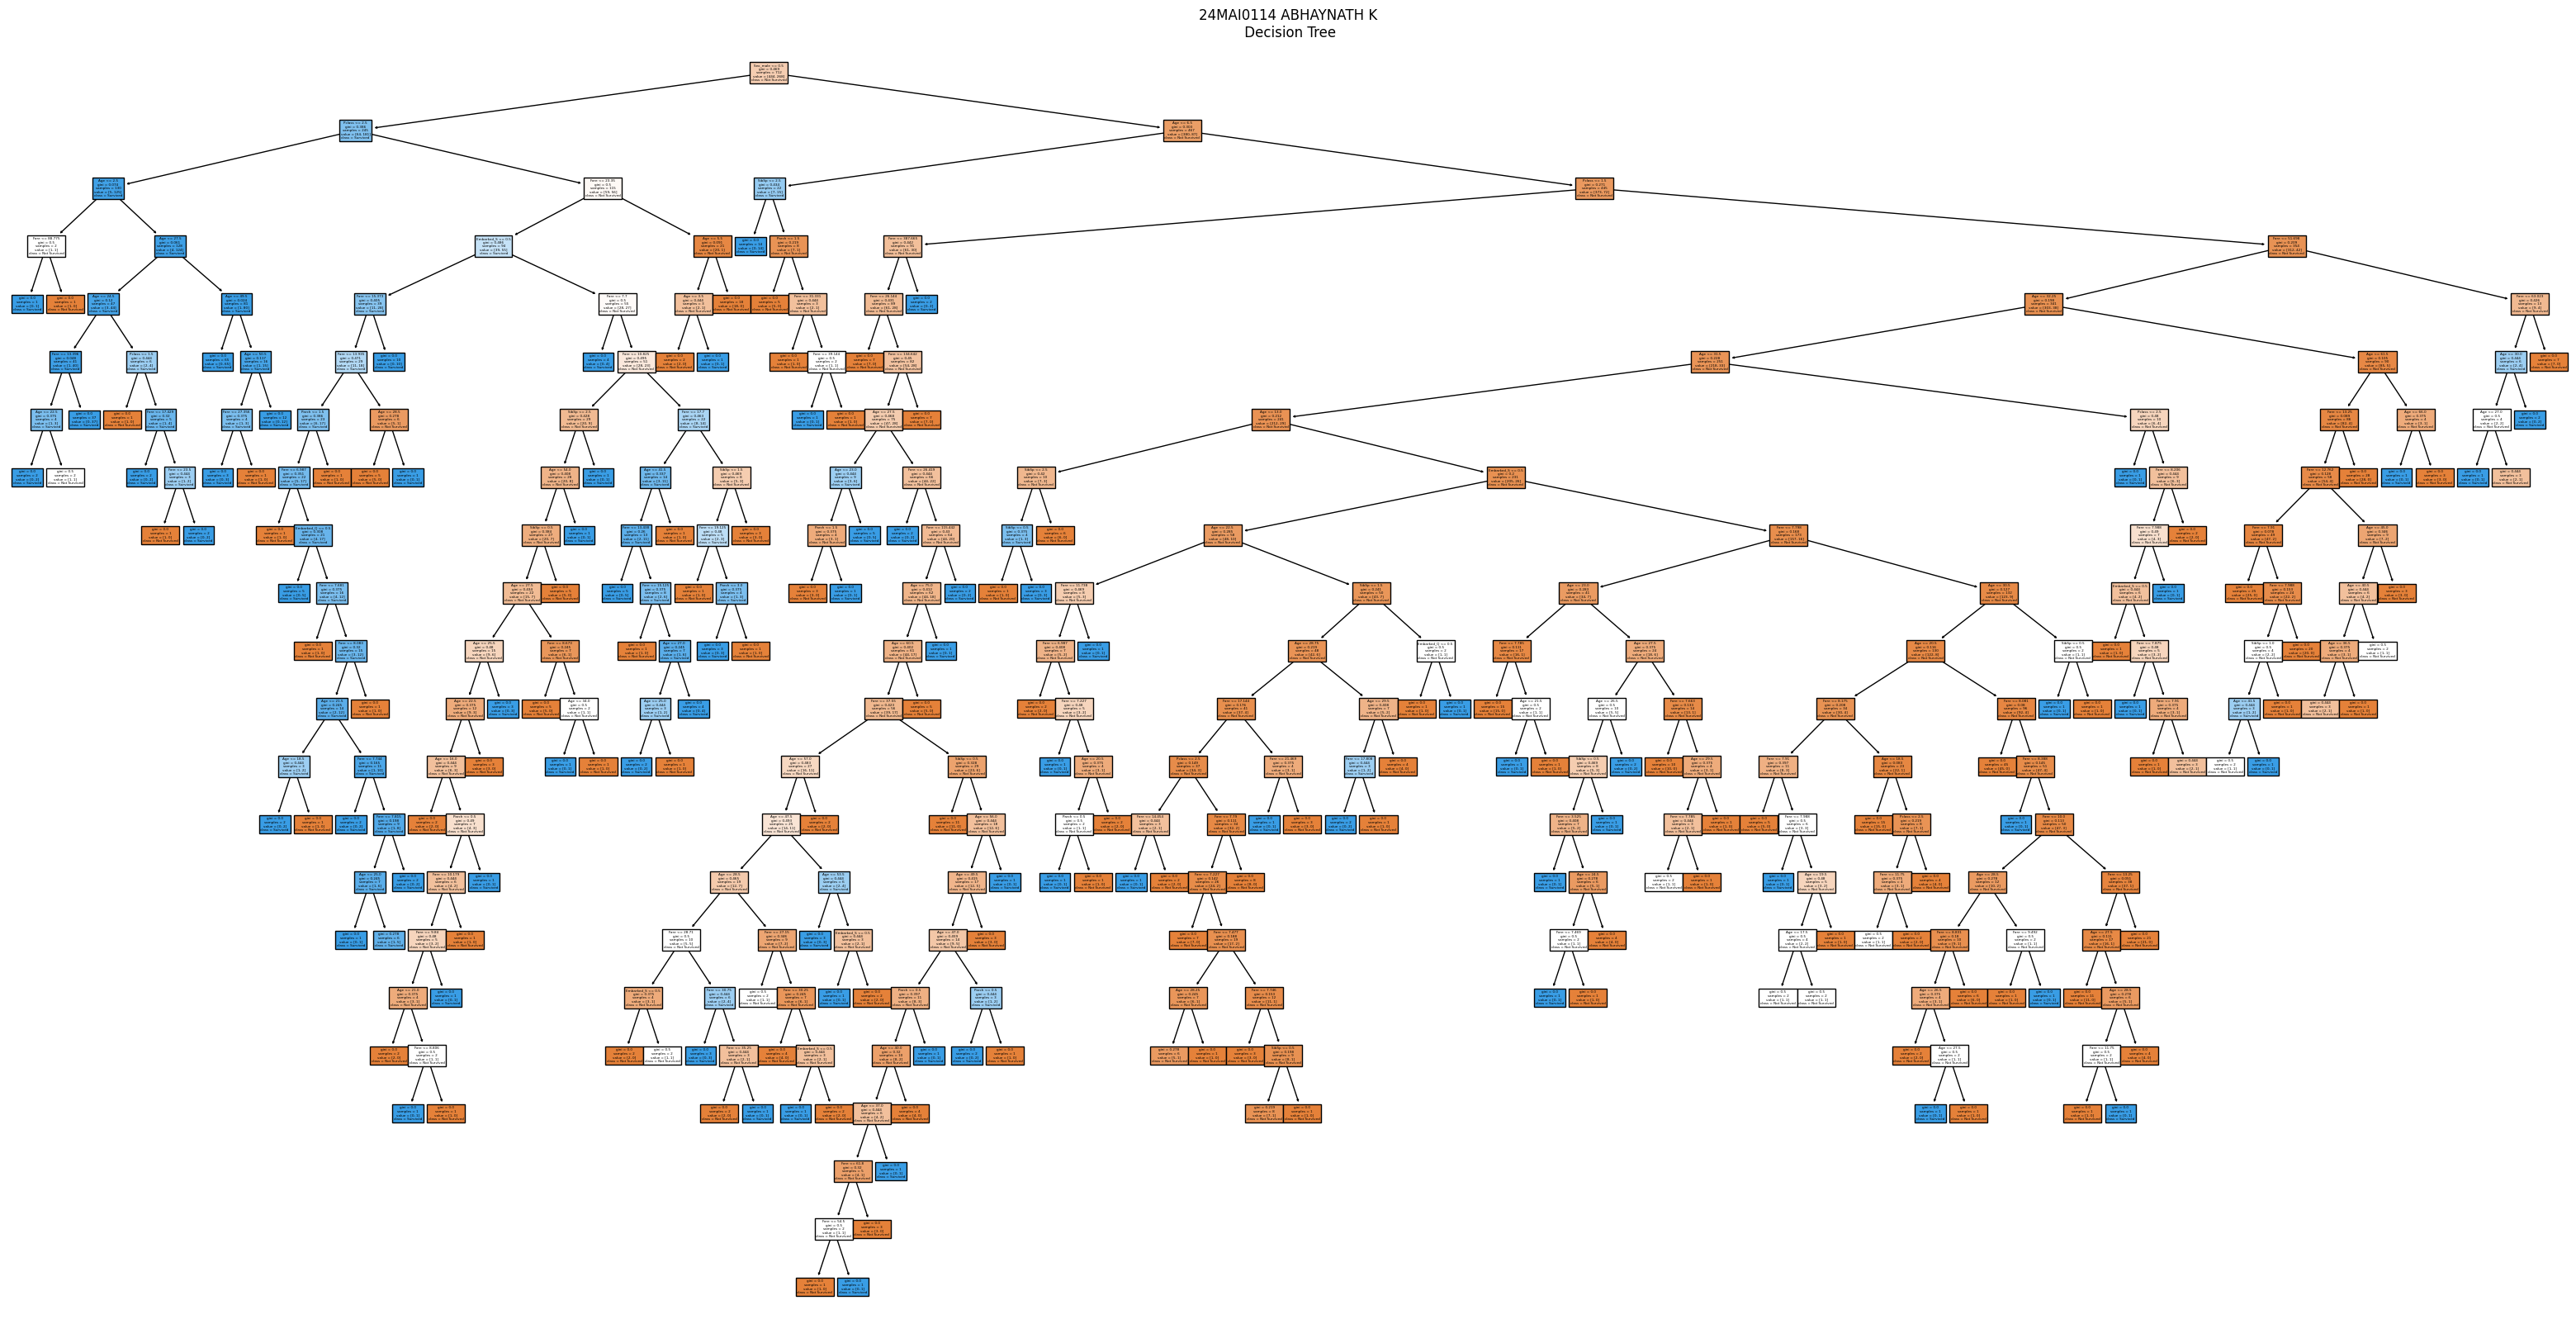

In [17]:
#24MAI0114 ABHAYNATH K
#visualization of the decision tree
plt.figure(figsize=(40,20))
tree.plot_tree(clf,filled=True, feature_names=x.columns,class_names=['Not Survived', 'Survived'])
plt.title("24MAI0114 ABHAYNATH K\n Decision Tree")
plt.show()

In [18]:
#24MAI0114 ABHAYNATH K
#pediction  on new data
new_data={
    'Pclass': [3],
    'Age': [29],
    'SibSp':[0],
    'Parch': [0],
    'Fare': [7.25],
    'Sex_male': [1],
    'Embarked_Q':[0],
    'Embarked_S':[1]

}

In [19]:
#24MAI0114 ABHAYNATH K
#converting the new data into dataframe
new_data_df=pd.DataFrame(new_data)

#making prediction
new_prediction=clf.predict(new_data_df)
print(f'24MAI0114 ABHAYNATH K\nNew prediction: {new_prediction[0]} (0: Not survived , 1: Survived)')

24MAI0114 ABHAYNATH K
New prediction: 0 (0: Not survived , 1: Survived)
